In [1]:
from whalegrad.nn.layers.activations import ReLU, Sigmoid, Tanh
from whalegrad.nn.layers.base import Linear
from whalegrad.nn.loss import BCE
from whalegrad.nn.layers.model import Model
from whalegrad.nn.optim import Adam, Momentum, RMSProp, GD
from whalegrad.engine.whalor import Whalor
from whalegrad.nn.layers.base import Sequential
from whalegrad.engine.toolbox import grad_check
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import numpy as np

ImportError: cannot import name 'Sigmoid' from 'whalegrad.nn.layers.activations' (/Users/sasaurabhurabhvaishubhalone/Desktop/whalegrad/whalegrad/nn/layers/activations.py)

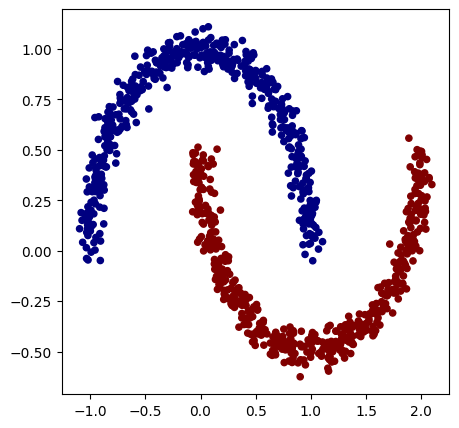

In [18]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=100)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X,y)

num_train, num_test = 750, 250 # number of train and test examples
num_iter = 50 # number of iterations
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
# data as tensors
X_train, X_test = Whalor(X_train_orig[:num_train,:]), Whalor(X_test_orig[:num_test,:])
y_train, y_test = Whalor(y_train_orig[:num_train].reshape(num_train,1)), Whalor(y_test_orig[:num_test].reshape(num_test,1))



In [3]:
# define the model
class NN(Model):
  def __init__(self):
    self.stack = Sequential(
      Linear(2,100),
      ReLU(),
      Linear(100,1),
      Sigmoid()
    )
  
  def forward(self, inputs):
    return self.stack(inputs)


In [4]:
model = NN()
loss_fn = BCE()
optim = Adam(model.parameters(), 0.05) 

In [20]:
print("number of parameters", len(model.parameters()))
print(model)

number of parameters 4
Model( ['Sequential(\nLinear(2, 100), ReLU(), Linear(100, 1), Sigmoid()\n)'] )


In [5]:
# training loop
def train(optim, model=model, num_iter=100, loss_list=None, print_freq=1, print_vals=False):
  epoch_count = []
  train_losss = []
  test_losss = []

  for i in range(num_iter):
    optim.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    if loss_list is not None:
      loss_list.append(loss.data)
    loss.backward()
    optim.step()
    if i % 20 == 0 :
       print(f"Epoch: {epoch} | Train loss: %0.3f | acc: %0.3f | Test loss: %0.3f |test_acc: %0.3f " % (loss,test_loss,test_acc))
    

In [ ]:
def accuracy(y_true ,y_preds):
  correct = torch.eq(y_true,y_preds).sum().item()
  acc = ( correct / len(y_preds) ) * 100

  return acc

In [23]:
epochs = 100
epoch_count = []
train_losss = []
test_losss = [] 

def train(optim, model=model, num_iter=100, loss_list=None, print_freq=1, print_vals=False):
  
  
   
  for epoch in range(epochs):
      
    optim.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    if loss_list is not None:
      loss_list.append(loss.data)
    loss.backward()
    optim.step()
  
    # model_2.train()
  
    # y_logitis = model_2(X_train.to(device)).squeeze()
  
    # y_pred = torch.round(torch.sigmoid(y_logitis))
  
    # train_loss = loss_fn(y_logitis,y_train)
  
    acc = accuracy(y_true=y_train,y_preds=outputs)
  
    # optimizer.zero_grad()
  
    # train_loss.backward()
  
    # optimizer.step()
    if epoch % 20 == 0 :
        epoch_count.append(100)
        train_losss.append(loss)
        print(f"Epoch: {epoch} | Train loss: %0.3f | acc: %0.3f " % (loss, acc))
    

In [24]:
train(optim, print_vals=True)

TypeError: Optimizer.zero_grad() missing 1 required positional argument: 'self'

AttributeError: 'NN' object has no attribute 'params'

In [7]:
adam_losses = []
momentum_losses = []
rms_losses = []
gd_losses = []

losses = [
  adam_losses,
  momentum_losses,
  rms_losses,
  gd_losses
]

optims = [
  Adam,
  Momentum,
  RMSProp,
  GD
]

In [8]:
num_iter = 100
for optim,loss_list in zip(optims, losses):
  model = NN() # Resetting the model, to remove the previously learnt weights
  train(optim(model.parameters(), 0.005), model=model, num_iter=num_iter, loss_list=loss_list)

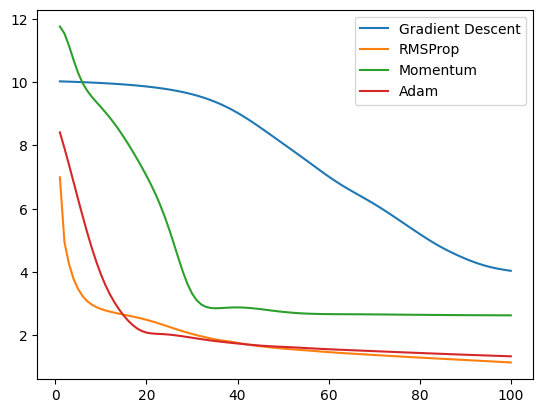

In [9]:
plt.plot(np.arange(1, num_iter+1, 1), gd_losses, label='Gradient Descent')
plt.plot(np.arange(1, num_iter+1, 1), rms_losses, label='RMSProp')
plt.plot(np.arange(1, num_iter+1, 1), momentum_losses, label='Momentum')
plt.plot(np.arange(1, num_iter+1, 1), adam_losses, label='Adam')
plt.legend()
plt.show()

In [10]:
# evaluate the model
with model.eval():
  test_outputs = model(X_test)
  preds = np.where(test_outputs.data>=0.5, 1, 0)


In [11]:

print(classification_report(y_test.data.astype(int).flatten(), preds.flatten()))

print(accuracy_score(y_test.data.astype(int).flatten(), preds.flatten()))

grad_check(model, X_train, y_train, loss_fn)

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       118
           1       0.99      0.73      0.84       132

    accuracy                           0.85       250
   macro avg       0.88      0.86      0.85       250
weighted avg       0.88      0.85      0.85       250

0.852
Gradient Check Distance: 1.36008944050568e-08
Gradient Vibe PASSED


1.36008944050568e-08

In [13]:
# visualize decision boundary

# Generate a meshgrid of points
x_min, x_max = X_train_orig[:, 0].min() - 1, X_train_orig[:, 0].max() + 1
y_min, y_max = X_train_orig[:, 1].min() - 1, X_train_orig[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Flatten the meshgrid points and convert to WhaleGrad tensor
meshgrid_points = Whalor(np.c_[xx.ravel(), yy.ravel()])

# Make predictions on the meshgrid points
with model.eval():
    predictions = model(meshgrid_points)
    predictions = predictions.data.numpy()

# Reshape predictions to the shape of the meshgrid
predictions = predictions.reshape(xx.shape)

# Plot the training data points
plt.scatter(X_train_orig[:, 0], X_train_orig[:, 1], c=y_train_orig, cmap=plt.cm.Spectral)

# Plot the decision boundary
plt.contourf(xx, yy, predictions, cmap=plt.cm.Spectral, alpha=0.3)

# Show the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the Trained Model')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [17]:
# Make predictions on the meshgrid points
with model.eval():
  test_outputs = model(X_test)
  predictions = np.where(test_outputs.data>=0.5, 1, 0)

# Reshape predictions to the shape of the meshgrid
predictions = predictions.reshape(xx.shape)

# Plot the training data points and the decision boundary
plt.scatter(X_train_orig[:, 0], X_train_orig[:, 1], c=y_train_orig, cmap=plt.cm.Spectral)
plt.contourf(xx, yy, predictions, cmap=plt.cm.Spectral, alpha=0.3)

# Show the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the Trained Model')
plt.show()


ValueError: cannot reshape array of size 250 into shape (374,520)